# Chicago Bike Share Data Examination #

I wanted to explore how often riders dropped off their bikes at the same station where they picked it up. I wanted to explore this in a couple ways, including by gender.

I chose Chicago because I lived there for many years, and the Washington DC data did not include gender.

To do this, I wrote an additional function for condensing the data. In this function, I pre-computed if the station was the same and if the ride occurred on a weekend.

What I quickly found was that most riders dropped off at a different station. Though I did explore this in a couple different ways, I then added the riders' ages to the data and did a final exploration of the age and genders of the riders, without regard to station dropoff.

All this was done with the 2016 Chicago data.

## Dropping off at the same station? ##

For Chicago riders, what proportion of users drop off their bike at the same station they picked it up?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from station_variance_fns import get_ratio_same_station_dropoff
from station_variance_fns import read_data_for_variance_analysis
from station_variance_fns import put_gender_age_datapoints_into_bins
from station_variance_fns import get_datapoints_gender_age

In [3]:
rides = read_data_for_variance_analysis('data/Chicago-station-variance.csv')

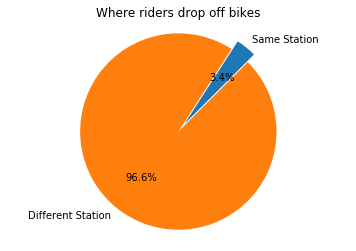

In [4]:
# c.f. https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
all_ratio = get_ratio_same_station_dropoff(rides)
labels = 'Same Station', 'Different Station'
data = [all_ratio, 1 - all_ratio]
explode = (0.10, 0)

_, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Where riders drop off bikes')
plt.show()


What proportion of users drop off their bike at the same station on weekends?

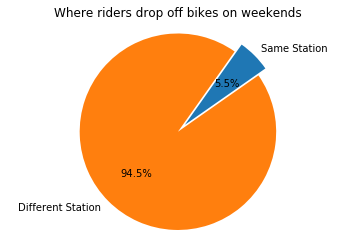

In [5]:
weekend_ratio = get_ratio_same_station_dropoff(rides, True)
labels = 'Same Station', 'Different Station'
data = [weekend_ratio, 1 - weekend_ratio]
explode = (0.10, 0)

_, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', startangle=35)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Where riders drop off bikes on weekends')
plt.show()


What about subscribers vs customers, dropping off at the same station where they picked up?

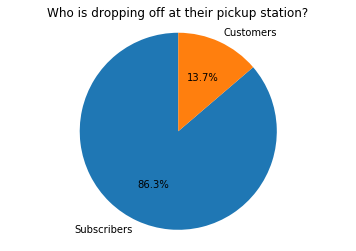

In [6]:
ratio_subscribers_only = get_ratio_same_station_dropoff(rides, False, False, 'Subscriber')
ratio_customers_only = get_ratio_same_station_dropoff(rides, False, False, 'Customer')

total = ratio_subscribers_only + ratio_customers_only

subscriber_ratio_100 = ratio_subscribers_only / total
customer_ratio_100 = ratio_customers_only / total

labels = 'Subscribers', 'Customers'
data = [subscriber_ratio_100, customer_ratio_100]

_, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Who is dropping off at their pickup station?')
plt.show()

## Who is Riding? ##

For Chicago riders, how old are the men and women?

In [15]:
# c.f. https://pythonspot.com/en/matplotlib-bar-chart/
# c.f. https://matplotlib.org/examples/api/barchart_demo.html

# data to plot
pointdata = get_datapoints_gender_age(rides)
male_bins, female_bins = put_gender_age_datapoints_into_bins(pointdata)

num_bins = max(len(male_bins), len(female_bins))

# create the labels
range_start = 0
range_end = 100
step_size = (range_end - range_start) // num_bins
labels = np.arange(range_start, range_end, step_size)

IndexError: list index out of range

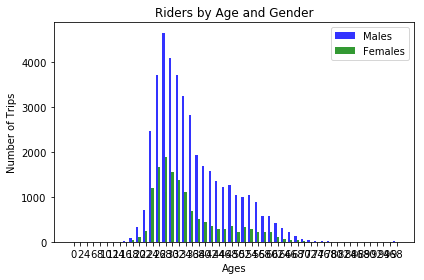

In [16]:
# create plot
_, ax = plt.subplots()
index = np.arange(num_bins)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, male_bins, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Males')

rects2 = plt.bar(index + bar_width, female_bins, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Females')

plt.xlabel('Ages')
plt.ylabel('Number of Trips')
plt.title('Riders by Age and Gender')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()
